# Starbucks Capstone Challenge

### Introduction

This data set contains simulated data that mimics customer behavior on the Starbucks rewards mobile app. Once every few days, Starbucks sends out an offer to users of the mobile app. An offer can be merely an advertisement for a drink or an actual offer such as a discount or BOGO (buy one get one free). Some users might not receive any offer during certain weeks. 

Not all users receive the same offer, and that is the challenge to solve with this data set.

Your task is to combine transaction, demographic and offer data to determine which demographic groups respond best to which offer type. This data set is a simplified version of the real Starbucks app because the underlying simulator only has one product whereas Starbucks actually sells dozens of products.

Every offer has a validity period before the offer expires. As an example, a BOGO offer might be valid for only 5 days. You'll see in the data set that informational offers have a validity period even though these ads are merely providing information about a product; for example, if an informational offer has 7 days of validity, you can assume the customer is feeling the influence of the offer for 7 days after receiving the advertisement.

You'll be given transactional data showing user purchases made on the app including the timestamp of purchase and the amount of money spent on a purchase. This transactional data also has a record for each offer that a user receives as well as a record for when a user actually views the offer. There are also records for when a user completes an offer. 

Keep in mind as well that someone using the app might make a purchase through the app without having received an offer or seen an offer.

### Example

To give an example, a user could receive a discount offer buy 10 dollars get 2 off on Monday. The offer is valid for 10 days from receipt. If the customer accumulates at least 10 dollars in purchases during the validity period, the customer completes the offer.

However, there are a few things to watch out for in this data set. Customers do not opt into the offers that they receive; in other words, a user can receive an offer, never actually view the offer, and still complete the offer. For example, a user might receive the "buy 10 dollars get 2 dollars off offer", but the user never opens the offer during the 10 day validity period. The customer spends 15 dollars during those ten days. There will be an offer completion record in the data set; however, the customer was not influenced by the offer because the customer never viewed the offer.

### Cleaning

This makes data cleaning especially important and tricky.

You'll also want to take into account that some demographic groups will make purchases even if they don't receive an offer. From a business perspective, if a customer is going to make a 10 dollar purchase without an offer anyway, you wouldn't want to send a buy 10 dollars get 2 dollars off offer. You'll want to try to assess what a certain demographic group will buy when not receiving any offers.

### Final Advice

Because this is a capstone project, you are free to analyze the data any way you see fit. For example, you could build a machine learning model that predicts how much someone will spend based on demographics and offer type. Or you could build a model that predicts whether or not someone will respond to an offer. Or, you don't need to build a machine learning model at all. You could develop a set of heuristics that determine what offer you should send to each customer (i.e., 75 percent of women customers who were 35 years old responded to offer A vs 40 percent from the same demographic to offer B, so send offer A).

# Data Sets

The data is contained in three files:

* portfolio.json - containing offer ids and meta data about each offer (duration, type, etc.)
* profile.json - demographic data for each customer
* transcript.json - records for transactions, offers received, offers viewed, and offers completed

Here is the schema and explanation of each variable in the files:

**portfolio.json**
* id (string) - offer id
* offer_type (string) - type of offer ie BOGO, discount, informational
* difficulty (int) - minimum required spend to complete an offer
* reward (int) - reward given for completing an offer
* duration (int) - time for offer to be open, in days
* channels (list of strings)

**profile.json**
* age (int) - age of the customer 
* became_member_on (int) - date when customer created an app account
* gender (str) - gender of the customer (note some entries contain 'O' for other rather than M or F)
* id (str) - customer id
* income (float) - customer's income

**transcript.json**
* event (str) - record description (ie transaction, offer received, offer viewed, etc.)
* person (str) - customer id
* time (int) - time in hours since start of test. The data begins at time t=0
* value - (dict of strings) - either an offer id or transaction amount depending on the record

**Note:** If you are using the workspace, you will need to go to the terminal and run the command `conda update pandas` before reading in the files. This is because the version of pandas in the workspace cannot read in the transcript.json file correctly, but the newest version of pandas can. You can access the termnal from the orange icon in the top left of this notebook.  

You can see how to access the terminal and how the install works using the two images below.  First you need to access the terminal:

<img src="pic1.png"/>

Then you will want to run the above command:

<img src="pic2.png"/>

Finally, when you enter back into the notebook (use the jupyter icon again), you should be able to run the below cell without any errors.

Business understanding:-Starbucks Corporation is an American multinational chain of coffeehouses and roastery reserves headquartered in Seattle, Washington. As the world's largest coffeehouse chain, Starbucks is seen to be the main representation of the United States' third wave of coffee culture.  As of September 2020, the company had 32,660 stores in 83 countries, including 16,637 company operated stores and 16,023 licensed stores.
Starbucks uses Datascience for segmentation, targeting and positioning marketing decisions directed at identifying appropriate group of people among the general public as future customers for the business and targeting this segment via positioning products and services that resonates well with their needs and wants.
In nutshell Starbucks uses datascience to decide what to sell to whom. Accordingly the company can position products and services.

Objective of the project:- The objective of the project is to identify the segment of the customers that starbucks should
target.

Process followed: 1)Understanding the data 2)Cleaning the data 3)Exploring the data.

# Import Data

In [14]:
import pandas as pd
import numpy as np
import math
import json
import matplotlib.pyplot as plt
% matplotlib inline
from sklearn.preprocessing import MultiLabelBinarizer
import seaborn as sns
# read in the json files
portfolio = pd.read_json('data/portfolio.json', orient='records', lines=True)
profile = pd.read_json('data/profile.json', orient='records', lines=True)
transcript = pd.read_json('data/transcript.json', orient='records', lines=True)

# Datawrangling of the portfolio dataset

In [15]:
portfolio.head(1)

,channels,difficulty,duration,id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10


In [16]:
#check if null values present
portfolio.isnull().sum().sum()

0

In [17]:
#check number of rows and columns
portfolio.shape

(10, 6)

In [18]:
#As mentioned in the description, id=offer id, hence rename id to offer id
portfolio = portfolio.rename(columns={'id':'offer_id'})
portfolio.head(1)

,channels,difficulty,duration,offer_id,offer_type,reward
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10


# Datawrangling of Profile Dataset

In [19]:
profile.head(2)

,age,became_member_on,gender,id,income
0,118,20170212,None,68be06ca386d4c31939f3a4f0e3dd783,NaN
1,55,20170715,F,0610b486422d4921ae7d2bf64640c50b,112000.0


In [20]:
#check number of rows and columns
profile.shape

(17000, 5)

In [21]:
#check null values
profile.isnull().sum()

age                    0
became_member_on       0
gender              2175
id                     0
income              2175
dtype: int64

In [22]:
#As gender being a categorical value fill the missing gender values with mode. Income is a numeric continuous value, 
#hence fill the missing values with mean
#Rename id columns as customer_id so that we can use it later for concatenation.
#change became_member_on to a proper format so that it can be used for analysis.

profile['gender'].fillna((profile['gender'].mode()[0]), inplace=True)
profile['income'].fillna((profile['income'].mean()), inplace=True)
profile = profile.rename(columns={'id':'customer_id'})
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

In [23]:
profile.head(2)

,age,became_member_on,gender,customer_id,income
0,118,2017-02-12,M,68be06ca386d4c31939f3a4f0e3dd783,65404.991568
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.000000


In [24]:
profile.isnull().sum().sum()

0

In [25]:
#In the above row we see age 118, which definitly looks like an outliers,we decided to drop all ages above 115.
profile = profile.drop(profile[(profile.age > 105)].index)

In [26]:
profile.shape

(14825, 5)

# Datawrangling of Transcript Dataset

In [27]:
transcript.head(2)

,event,person,time,value
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}


In [28]:
#check null values in the dataset
transcript.isnull().sum().sum()

0

In [29]:
#Use value column and extact offer_id and amount out of it. Offer_id will be used for concatenation later.
#And amount will be used to analyse spend by the customer.
#https://stackoverflow.com/questions/60106364/

transcript['offer_id'] = [[*x.values()][0]if [*x.keys()][0] in ['offer id','offer_id'] else None for x in transcript.value]
transcript['amount'] = [[*x.values()][0]if [*x.keys()][0] == 'amount' else None for x in transcript.value]

In [30]:
transcript.head(2)

,event,person,time,value,offer_id,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN


In [31]:
#Drop the Value column from the data set and rename person column to customer_id
transcript=transcript.drop(columns='value')
transcript=transcript.rename(columns={'person':'customer_id'})
transcript.head(2)

,event,customer_id,time,offer_id,amount
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN
1,offer received,a03223e636434f42ac4c3df47e8bac43,0,0b1e1539f2cc45b7b9fa7c272da2e1d7,NaN


# Onehot Encoding

In [32]:
#Code source Udacity Mentor ,https://knowledge.udacity.com/questions/567811
#Creating dummy variable for channel
mlb = MultiLabelBinarizer()
channel_d = pd.DataFrame(mlb.fit_transform(portfolio['channels']), columns=mlb.classes_, index=portfolio.index)
channel_d.head(1)

,email,mobile,social,web
0,1,1,1,0


In [33]:
#creating dummy variable for offer
offer_d=pd.get_dummies(portfolio.offer_type)
offer_d.head(1)

,bogo,discount,informational
0,1,0,0


In [34]:
#Concatenate Channel and offer dummies with portfolio
portfolio = pd.concat([portfolio, channel_d, offer_d], axis=1)
portfolio.head(1)

,channels,difficulty,duration,offer_id,offer_type,reward,email,mobile,social,web,bogo,discount,informational
0,"[email, mobile, social]",10,7,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,1,1,1,0,1,0,0


In [35]:
portfolio.columns.duplicated().sum()

0

# Onehot Encoding Profile

In [36]:
#Create dummy variables for gender 
gender_d=pd.get_dummies(profile.gender)
gender_d.head(1)

,F,M,O
1,1,0,0


In [37]:
#One Hot encoding of "became_member_on" column of Profile dataset. Here I want to extrat Year and create columns for just 
#those years. 
profile['year'] = pd.DatetimeIndex(profile['became_member_on']).year
profile.head(1)

,age,became_member_on,gender,customer_id,income,year
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017


In [38]:
#Create dummy variable for year
year_d=pd.get_dummies(profile.year)
year_d.head(1)

,2013,2014,2015,2016,2017,2018
1,0,0,0,0,1,0


In [39]:
profile = pd.concat([profile, gender_d, year_d], axis=1)
profile=profile.rename(columns={'id':'customer_id'})

profile.head(1)

,age,became_member_on,gender,customer_id,income,year,F,M,O,2013,2014,2015,2016,2017,2018
1,55,2017-07-15,F,0610b486422d4921ae7d2bf64640c50b,112000.0,2017,1,0,0,0,0,0,0,1,0


In [40]:
profile.columns.duplicated().sum()

0

# Onehot encoding Transcript

In [41]:
#create dummy variable for event
event_d=pd.get_dummies(transcript.event)
event_d.head(2)

,offer completed,offer received,offer viewed,transaction
0,0,1,0,0
1,0,1,0,0


In [42]:
#concatenate dummy variables with the parent dataset
transcript = pd.concat([transcript, event_d], axis=1)
transcript.head(1)

,event,customer_id,time,offer_id,amount,offer completed,offer received,offer viewed,transaction
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0


In [43]:
#Find duplicate columns if any
transcript.columns.duplicated().sum()


0

In [44]:
#delete duplicate columns if any
transcript= transcript.loc[:,~transcript.columns.duplicated()]

# Merge Encoded Dataframes

In [45]:
#Merge transcript and profile dataframe to create df1 dataframe
df1= pd.merge(transcript, profile, on='customer_id')
df1.head(1)

,event,customer_id,time,offer_id,amount,offer completed,offer received,offer viewed,transaction,age,...,year,F,M,O,2013,2014,2015,2016,2017,2018
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0,75,...,2017,1,0,0,0,0,0,0,1,0


In [46]:
#Merge the df1 dataframe to portfolio dataframe
df2 = pd.merge(df1,portfolio, on='offer_id', how='left')
pd.set_option('display.max_columns',None)
df2.head(1)

,event,customer_id,time,offer_id,amount,offer completed,offer received,offer viewed,transaction,age,became_member_on,gender,income,year,F,M,O,2013,2014,2015,2016,2017,2018,channels,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,NaN,0,1,0,0,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,"[web, email, mobile]",5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


# Create Offer and Transaction Dataframe

In [47]:
#Create transaction dataframe d3
df3=df2.query('event=="transaction"')
df3.head(4)

,event,customer_id,time,offer_id,amount,offer completed,offer received,offer viewed,transaction,age,became_member_on,gender,income,year,F,M,O,2013,2014,2015,2016,2017,2018,channels,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational
2,transaction,78afa995795e4d85b5d9ceeca43f5fef,132,None,19.89,0,0,0,1,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,transaction,78afa995795e4d85b5d9ceeca43f5fef,144,None,17.78,0,0,0,1,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,transaction,78afa995795e4d85b5d9ceeca43f5fef,222,None,19.67,0,0,0,1,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,transaction,78afa995795e4d85b5d9ceeca43f5fef,240,None,29.72,0,0,0,1,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
#check shape of transaction(d3) dataframe
df3.shape

(123957, 35)

In [49]:
#find null values in the newly created datafarme
df3.isnull().sum()

event                    0
customer_id              0
time                     0
offer_id            123957
amount                   0
offer completed          0
offer received           0
offer viewed             0
transaction              0
age                      0
became_member_on         0
gender                   0
income                   0
year                     0
F                        0
M                        0
O                        0
2013                     0
2014                     0
2015                     0
2016                     0
2017                     0
2018                     0
channels            123957
difficulty          123957
duration            123957
offer_type          123957
reward              123957
email               123957
mobile              123957
social              123957
web                 123957
bogo                123957
discount            123957
informational       123957
dtype: int64

In [50]:
#Fill the null values for channle,difficulty,duration,offer type, reward,email,mobile,social , web , bogo,discount and informational with 0

df3.update(df3[['channels','difficulty','duration','offer_type','reward','email','mobile','social','web','bogo','discount','informational']].fillna(0))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:5085: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


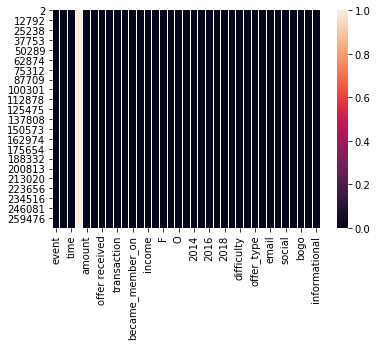

In [51]:
#check null values using heatmap
sns.heatmap(df3.isnull())

In [52]:
#After merging there are many rows with no offer id and amount. We will that with 0

df3.update(df3[['offer_id','amount']].fillna(0))

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:5085: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[col] = expressions.where(mask, this, that)


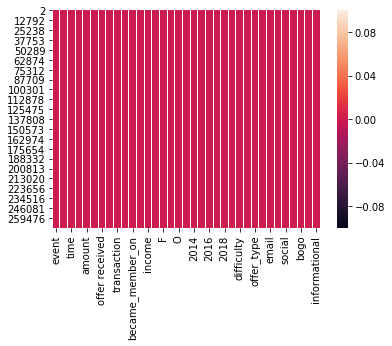

In [53]:
#Visualitation of cleaned transaction dataset
sns.heatmap(df3.isnull())

# Create Offer Dataframe

In [54]:
#Create offer dataframe d4
df4=df2.query('event !="transaction"')
df4['channels'] = df4['channels'].apply(lambda x : ','.join(x))

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [55]:
#check duplicate rows
df4.duplicated().sum()

374

In [56]:
#drop duplicate rows
df4=df4.drop_duplicates(subset=None, keep='first', inplace=False)

In [57]:
#Find null value in the offer(d4) dataframe
df4.isnull().sum()

event                    0
customer_id              0
time                     0
offer_id                 0
amount              148431
offer completed          0
offer received           0
offer viewed             0
transaction              0
age                      0
became_member_on         0
gender                   0
income                   0
year                     0
F                        0
M                        0
O                        0
2013                     0
2014                     0
2015                     0
2016                     0
2017                     0
2018                     0
channels                 0
difficulty               0
duration                 0
offer_type               0
reward                   0
email                    0
mobile                   0
social                   0
web                      0
bogo                     0
discount                 0
informational            0
dtype: int64

In [58]:
#Fill the null amount cell with 0
df4.head(2)
df4.update(df4[['amount']].fillna(0))

In [59]:
#recheck the null values in offer (d4) dataframe
df4.isnull().sum().sum()

0

In [60]:
df4.head(2)

,event,customer_id,time,offer_id,amount,offer completed,offer received,offer viewed,transaction,age,became_member_on,gender,income,year,F,M,O,2013,2014,2015,2016,2017,2018,channels,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,1,0,0,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,"web,email,mobile",5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,0,1,0,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,"web,email,mobile",5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0


In [61]:
#Create age range as it is difficult to plot all ages in the graph
#https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python
#https://www.codegrepper.com/code-examples/python/create+age-groups+in+pandas

def age_range(df):
    '''
    this def function intend to create a column with age range(certain age grouped together)
    
    INPUT: dataframe
    OUTPUT: original dataframe with an additional column with the labels mentioned below.
    '''
    bins = [18, 30, 40, 50, 60, 70, 120] 
    labels = ['10-30','31-40', '41-50', '51-60', '61-70', '70+']
    df['age_range'] = pd.cut(df.age, bins, labels = labels,include_lowest = True) 
    return df.head()

age_range(df4)

,event,customer_id,time,offer_id,amount,offer completed,offer received,offer viewed,transaction,age,became_member_on,gender,income,year,F,M,O,2013,2014,2015,2016,2017,2018,channels,difficulty,duration,offer_type,reward,email,mobile,social,web,bogo,discount,informational,age_range
0,offer received,78afa995795e4d85b5d9ceeca43f5fef,0,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,1,0,0,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,"web,email,mobile",5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,70+
1,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,6,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,0,0,1,0,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,"web,email,mobile",5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,70+
3,offer completed,78afa995795e4d85b5d9ceeca43f5fef,132,9b98b8c7a33c4b65b9aebfe6a799e6d9,0.0,1,0,0,0,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,"web,email,mobile",5.0,7.0,bogo,5.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,70+
5,offer received,78afa995795e4d85b5d9ceeca43f5fef,168,5a8bc65990b245e5a138643cd4eb9837,0.0,0,1,0,0,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,"email,mobile,social",0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,70+
6,offer viewed,78afa995795e4d85b5d9ceeca43f5fef,216,5a8bc65990b245e5a138643cd4eb9837,0.0,0,0,1,0,75,2017-05-09,F,100000.0,2017,1,0,0,0,0,0,0,1,0,"email,mobile,social",0.0,3.0,informational,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,70+


# Data Exploration

In [62]:
df3.describe()

,time,amount,offer completed,offer received,offer viewed,transaction,age,income,year,F,M,O,2013,2014,2015,2016,2017,2018,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
count,123957.000000,123957.000000,123957.0,123957.0,123957.0,123957.0,123957.000000,123957.000000,123957.000000,123957.000000,123957.000000,123957.000000,123957.000000,123957.000000,123957.000000,123957.000000,123957.000000,123957.000000,123957.0,123957.0,123957.0,123957.0,123957.0,123957.0,123957.0,123957.0,123957.0,123957.0
mean,381.278201,13.996325,0.0,0.0,0.0,1.0,52.713965,61843.510250,2016.314666,0.398380,0.587252,0.014368,0.027493,0.066015,0.141775,0.251434,0.355615,0.157668,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,201.829085,31.749420,0.0,0.0,0.0,0.0,17.906667,20661.890394,1.241192,0.489566,0.492330,0.119002,0.163517,0.248309,0.348821,0.433839,0.478701,0.364430,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.050000,0.0,0.0,0.0,1.0,18.000000,30000.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,210.000000,3.660000,0.0,0.0,0.0,1.0,39.000000,46000.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,402.000000,10.800000,0.0,0.0,0.0,1.0,54.000000,60000.000000,2017.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,552.000000,19.130000,0.0,0.0,0.0,1.0,65.000000,74000.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,714.000000,1062.280000,0.0,0.0,0.0,1.0,101.000000,120000.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
df4.describe()

,time,amount,offer completed,offer received,offer viewed,transaction,age,income,year,F,M,O,2013,2014,2015,2016,2017,2018,difficulty,duration,reward,email,mobile,social,web,bogo,discount,informational
count,148431.000000,148431.0,148431.000000,148431.000000,148431.000000,148431.0,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.0,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000,148431.000000
mean,354.156598,0.0,0.216060,0.448026,0.335914,0.0,54.777735,66403.116600,2016.576510,0.428199,0.557087,0.014714,0.018170,0.044061,0.113103,0.220136,0.376815,0.227715,7.883205,6.622498,4.440764,1.0,0.917490,0.658649,0.806617,0.428994,0.418343,0.152664
std,198.325034,0.0,0.411557,0.497293,0.472310,0.0,17.192660,21494.443303,1.186675,0.494819,0.496732,0.120406,0.133567,0.205231,0.316720,0.414340,0.484590,0.419359,5.038865,2.133171,3.373373,0.0,0.275141,0.474164,0.394952,0.494934,0.493289,0.359664
min,0.000000,0.0,0.000000,0.000000,0.000000,0.0,18.000000,30000.000000,2013.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,168.000000,0.0,0.000000,0.000000,0.000000,0.0,43.000000,51000.000000,2016.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,5.000000,2.000000,1.0,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,408.000000,0.0,0.000000,0.000000,0.000000,0.0,56.000000,65000.000000,2017.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,7.000000,5.000000,1.0,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
75%,510.000000,0.0,0.000000,1.000000,1.000000,0.0,67.000000,81000.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,10.000000,7.000000,5.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
max,714.000000,0.0,1.000000,1.000000,1.000000,0.0,101.000000,120000.000000,2018.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,20.000000,10.000000,10.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# Data Visualization

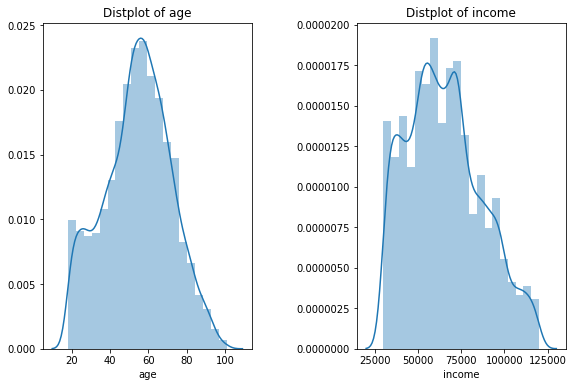

In [64]:
#Find the gender and income distribution
df5=df4[['customer_id','age','income','gender']]
df5.duplicated().sum()
df5=df5.drop_duplicates(subset=None, keep='first', inplace=False)

plt.figure(1,figsize=(15,6))
n=0
for x in['age','income']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df5[x],bins=20)
    plt.title('Distplot of {}'.format(x))
plt.show()

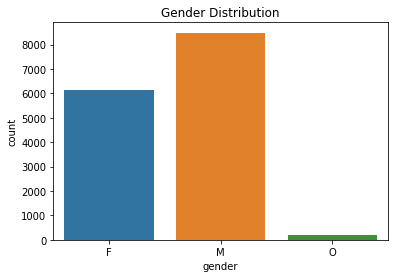

In [65]:
#Find gender Distribution
gen_dis = sns.countplot(x='gender', data=df5)
gen_dis.set_title('Gender Distribution');


In [66]:
gender=df5[['customer_id','gender']]
gender=gender['gender'].value_counts()
gender

M    8483
F    6125
O     212
Name: gender, dtype: int64

In [67]:
#Find number of customers by age group
df_age=df4[['customer_id','age','age_range']]
df_age=df_age.drop_duplicates(subset=None, keep='first', inplace=False)
df_age=df_age['age_range'].value_counts()
df_age

51-60    3588
61-70    2909
70+      2630
41-50    2391
10-30    1705
31-40    1597
Name: age_range, dtype: int64

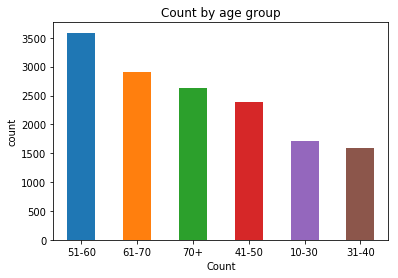

In [68]:
ax = df_age.plot.bar(rot=0)
ax.set(xlabel='Count', ylabel='count');
ax.set_title('Count by age group');

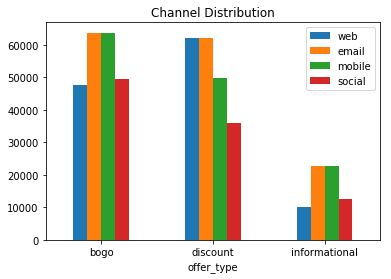

In [69]:
# Find offer type distribution by channels
channels = ['web', 'email', 'mobile', 'social']
portfolio_ch=df4.groupby('offer_type').sum()[channels]
ax = portfolio_ch.plot.bar(rot=0)
ax.set_title('Channel Distribution');

Text(0.5,1,'Event Distribution')

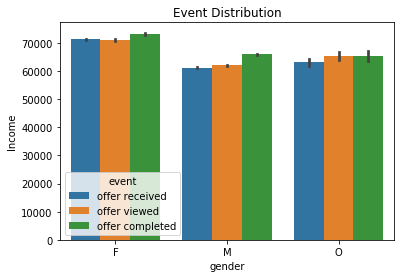

In [70]:
age_range(df4)
gen_in_off = sns.barplot(x='gender', y='income',hue='event', data=df4)
gen_in_off.set(xlabel='gender', ylabel='Income')
gen_in_off.set_title('Event Distribution')

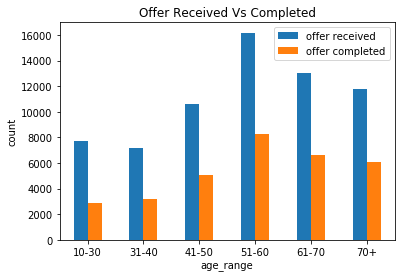

In [71]:
# Find offer received Vs completed
offer_conversion = ['offer received', 'offer completed']
offer_comp=df4.groupby('age_range').sum()[offer_conversion]
offer_comp = offer_comp.plot.bar(rot=0)
offer_comp.set(xlabel='age_range', ylabel='count')
offer_comp.set_title('Offer Received Vs Completed');

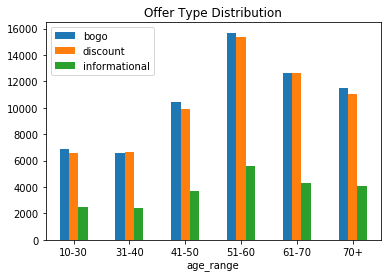

In [72]:
# Find offer type distribution.
offer_type = ['bogo', 'discount', 'informational']
offer_age=df4.groupby('age_range').sum()[offer_type]
offer_age = offer_age.plot.bar(rot=0)
offer_age.set_title('Offer Type Distribution');

In [73]:
#Find the year which showed maximum new customer
df_y=df4[['customer_id','offer completed','year']]
df_y=df_y.drop_duplicates(subset=None, keep='first', inplace=False)
df_y=df_y['year'].value_counts()
df_y

2017    10055
2018     6002
2016     5927
2015     3082
2014     1227
2013      513
Name: year, dtype: int64

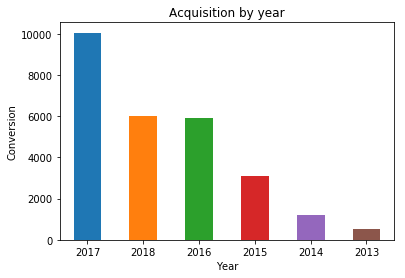

In [74]:
#Plot Year wise acqusition performance
ax = df_y.plot.bar(rot=0)
ax.set(xlabel='Year', ylabel='Conversion');
ax.set_title('Acquisition by year');

In [75]:
# Mathematical calculation of conversion performance between BOGO and Discount
offer_received = df4[df4['offer received'] == 1].offer_type.value_counts().sum()
Offer_viewed = df4[df4['offer viewed'] == 1].offer_type.value_counts().sum()
Offer_completed = df4[df4['offer completed'] == 1].offer_type.value_counts().sum()

offer_received=df4.groupby('bogo')['offer received'].value_counts()
offer_viewed=df4.groupby('bogo')['offer viewed'].value_counts()
offer_completed=df4.groupby('bogo')['offer completed'].value_counts()

In [76]:
#View rate of BOGO offer
eff_bogo1=offer_viewed/offer_received*100
eff_bogo1[1][1]

83.050081018954671

In [77]:
#Conversion rate of BOGO offer
eff_bogo2=offer_completed/offer_viewed*100
eff_bogo2[1][1]

68.514905394981625

In [78]:
offer_received=df4.groupby('discount')['offer received'].value_counts()
offer_viewed=df4.groupby('discount')['offer viewed'].value_counts()
offer_completed=df4.groupby('discount')['offer completed'].value_counts()

In [79]:
#View rate of discount offer
eff_discount1=offer_viewed/offer_received*100
eff_discount1[1][1]

69.235673567356741

In [80]:
#Conversion rate of discount offer
eff_discount2=offer_completed/offer_viewed*100
eff_discount2[1][1]

91.923514435837717

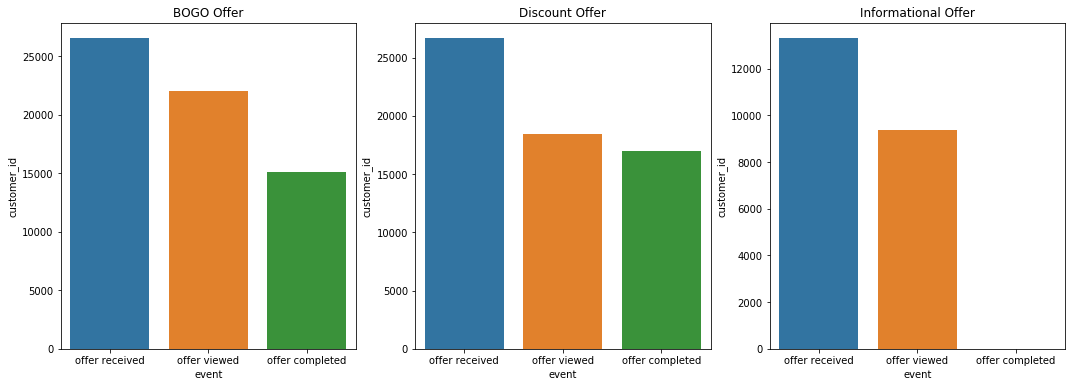

In [81]:
#Visual represenattion of offer type performance
df = df4.groupby(['event', 'offer_type'])['customer_id']
df=df.count().reset_index()
df['event'] = pd.Categorical(df['event'], ["offer received", "offer viewed", "offer completed"])
df.sort_values('event', inplace=True)

fig, xyz = plt.subplots(ncols=3, figsize=(18, 6))

ax = sns.barplot('event','customer_id', data=df.query('offer_type == "bogo"'),  ax=xyz[0])
ax.set(title='BOGO Offer')


ax = sns.barplot('event','customer_id', data=df.query('offer_type == "discount"'), ax=xyz[1])
ax.set(title='Discount Offer')

ax = sns.barplot('event','customer_id', data=df.query('offer_type == "informational"'),ax=xyz[2])
ax.set(title='Informational Offer');

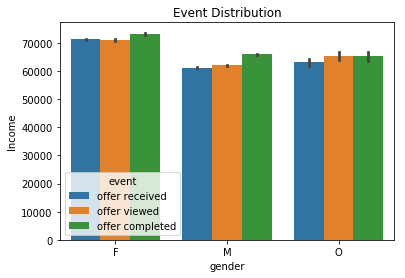

In [82]:
#plot barchart for gender ,Income and offer 
gen_in_off = sns.barplot(x='gender', y='income',hue='event', data=df4)
gen_in_off.set(xlabel='gender', ylabel='Income')
gen_in_off.set_title('Event Distribution');

In [83]:
#Find Spend by age group
age_range(df3)
df_t=df3[['customer_id','amount','age_range','gender']]
df_agg = df_t.groupby(['age_range',]).agg({'amount':sum})
pd.set_option('display.max_columns',None)
df_agg=df_agg.sort_values(by=['amount'],ascending=False)
df_agg.head()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,amount
age_range,
51-60,456253.76
61-70,366327.82
70+,341683.68
41-50,263208.25
31-40,162504.06


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


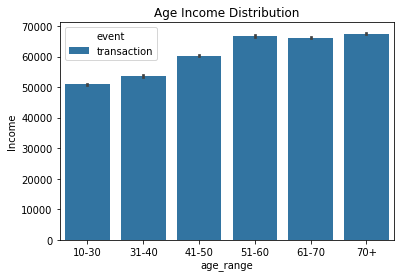

In [84]:
#Find age income distribution
age_range(df3)
income_ax=df3[['customer_id','age_range','gender','income','amount']]
income_ax = sns.barplot(x='age_range', y='income',hue='event', data=df3)
income_ax.set(xlabel='age_range', ylabel='Income')
income_ax.set_title('Age Income Distribution');

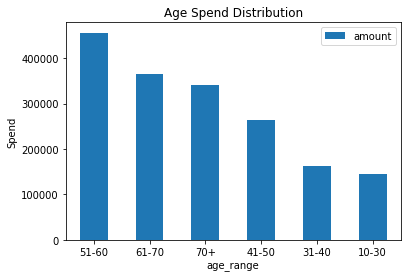

In [85]:
#Find age Vs spend distribution
spend_age = df_agg.plot.bar(rot=0)
spend_age.set(xlabel='age_range', ylabel='Spend');
spend_age.set_title('Age Spend Distribution');

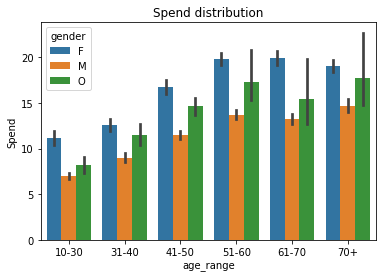

In [86]:
#Spend Distribution
sp_age_gen = sns.barplot(x='age_range', y='amount',hue='gender', data=df3) 
sp_age_gen.set(xlabel='age_range', ylabel='Spend')
sp_age_gen.set_title('Spend distribution');

# Conclusion and Findings

''''
As this is a customer segmentation usecase, I wanted to apply KMeans clustering. However,unable to plot logical scatter plot.
Probably I need more practice before I attempt this usecase with KMeans clustrering. The clusters with Kmeans algorithm was getting accumulated at two extreme ends, so nothing could be deducted out of it. 
Hence, I decided to approach this use case through visualization only.'''

Findings:-
1.	Age group 45-65:- The key age group that Starbucks should focus is between 45-65, particularly age group between 50 to 60. The data shows maximum population for this age group. The reason of this could be stability in career or high disposable income or kind of loyal professional customer who drink only starbucks coffee. This is my personal observation as well, I have seen many professionals in wallstreet who drink only starbucks coffee everyday no other coffee brand.
2.	Age group below 40:- The lowest customer range for starbucks is  age group below 40. This is little younger group than the above. May be this age group is not very much into coffee or may be going for a cheaper brand Or this age group may have kids or teen age children. Starbucks doesn’t have a lot to offer to Kids and Children the age group below 40 may choose to go to Dunkin Donut or McDonalds
3.	Gender: - The provided data set has more Male population than female.
4.	Channels of communication:-Buy one get one offers are sent mainly through email and mobile, this is the right thing to do, as most of the people carry smart phone, so it’s easy to produce and avail the offer. The means for sharing discount offer is mainly through web and email.
5.	Offers: - Age group 50-60 receives maximum offer and hence conversion is also highest for this category. Seems starbucks is little aggressive on BOGO offers than discounts. Although Starbucks is more aggressive on BOGO offers, however our analysis shows that the conversion rate of Discount offer is more than BOGO.
6.	Offer conversion:- Although the database has more male population, however the offers were sent more to female population and hence the conversion of female population is more.
7.	Performance:- Year 2017 showed an excellent conversion, whereas the following year 2018 is similar to 2016. Starbucks may need to ponder on what it did differently in 2017. Was there any new product or offer or was there any change in taste of the product or was there any event that particular year for which Starbucks may have opened temporary outlets. 
8.	Spending: - Regarding spending, it is found that the female population spends more than male. 50 to 70 age group female spend the most.


#Recommendations:- 
1.Recommendations:-
1.	Starbucks should continue targeting mid age population especially age group 50-60, especially female population.
2.	Starbucks should offer more Discount Offers than BOGO offers. Discount offers seem more attractive to customers as it is instant saving.
3.	Age group below 40 has spending potential as well, but this age group seems to be less interested in Starbucks, one of the reasons could be children. This age group may have kids or Teen age children. Starbucks doesn’t have a lot to offer to Kids and Children the age group below 40 may choose to go to Dunkin Donut or McDonalds. If starbucks wants to tap to this category, then they may need to attract kids with parents.
4.	Starbucks seems to be less aggressive on sharing information in comparison to sharing offer. Information is important to keep customers up-to-date and also to increase prospect pipeline. Information sharing through web or email should not be very expensive but it is a good source of advertisement.


Conclusion:- 
1. Age group 50-60 is Starbucks strong hold, especially female, Starbucks should keep providing them with new discount offers. Discount offer seems to attract customers more. The conversion rate of discount offer is 93% wheres of conversion rate of BOGO is 69%
    

#Justification

1.The story wasn’t coming out clear with scattered plot, hence I  solved the problem using visualization. 
2.Created age range , this helped in plotting the charts better.
3.Used both mathematical and visualization approach to reconfirm the findings.
4.Didn’t clean the oneHot encoded dataframe fully so that select columns could be carved out of the same dataframe for different analysis.
5.Didn’t create a lot of visuals as it may be confusing. The visuals created gives a fairly good idea on who our target customers are. Creating more visuals would just have reconfirmed the same things.



#Reflection 

Our problem statement was to recommend Starbucks about the target segment they should approach to maximize the conversion of prospect to customer. With this project I tried to derive who are the potential prospects who can be future customers.
In this project, I found it difficult to implement any machine learning algorithm and the fact that I found interesting is I got to know about MultiLabelBinarizer and how to split a dictionary.




#Improvement

Should have done more analysis on why KMeans clustering was giving strange result. With the given data, I believe  recency and frequency parameters could also be determined. This would have given accurate information on conversion. I believe , I may need to revisit the course material again and try to implement the same project may be in a sophisticated way. 
But for this Capstone project, I choose to deploy the project visualization only.

#Credits and Special Thanks to all Udacity mentors and staffs.

#Resources used
#https://towardsdatascience.com/customer-segmentation-using-k-means-clustering-d33964f238c3
#https://www.analyticsvidhya.com/blog/2021/01/profiling-market-segments-using-k-means-clustering/
#https://stackoverflow.com/questions/34165876/trying-to-create-grouped-variable-in-python
#https://www.codegrepper.com/code-examples/python/create+age-groups+in+pandas